
## Setup

Ignore / skip this step

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load Data

Making some fake data for our fake writing competition.

In [4]:
%%R -w 1000 -o df

# load data scored.csv into dataframe df
df <- read.csv('scored.csv')

In [10]:
%%R 
# Show the column names of the dataframe
colnames(df)

 [1] "Domain.name"       "name"              "title"            
 [4] "description"       "robots"            "viewport"         
 [7] "canonical"         "ogLocale"          "ogSiteName"       
[10] "ogType"            "ogTitle"           "ogDescription"    
[13] "ogUrl"             "ogImage"           "ogImageAlt"       
[16] "Domain.type"       "Agency"            "Organization.name"
[19] "City"              "State"             "score"            
[22] "count"            


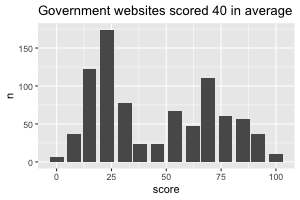

In [33]:
%%R -w 300 -h 200

# groupby "Domain.type", count the number of rows in each group, and draw a bar plot
df %>% 
    group_by(score) %>% 
    summarise(n = n()) %>% 
    ggplot(aes(x=score, y=n)) + 
    geom_bar(stat="identity") +
    # add title "Government websites scored 40 in average"
    ggtitle("Government websites scored 40 in average")

In [22]:
%%R 
# Show the rows where score=0, show the Domain.name and name columns
df %>% filter(score==0) %>% select(Domain.name, name)

              Domain.name
1                onrr.gov
2                 pay.gov
3        treaslockbox.gov
4 realpropertyprofile.gov
5                 nmb.gov
6               nscai.gov
                                                     name
1                              Department Of The Interior
2                              Department Of The Treasury
3                              Department Of The Treasury
4                         General Services Administration
5                                National Mediation Board
6 National Security Commission On Artificial Intelligence


In [24]:
%%R 
# Show the rows where score=100, show the Domain.name and name columns
df %>% filter(score==100) %>% select(Domain.name, name)

            Domain.name                                          name
1               dhs.gov               Department Of Homeland Security
2  homelandsecurity.gov               Department Of Homeland Security
3               epa.gov               Environmental Protection Agency
4      relocatefeds.gov               Environmental Protection Agency
5       urbanwaters.gov               Environmental Protection Agency
6              nasa.gov National Aeronautics And Space Administration
7               nrc.gov                 Nuclear Regulatory Commission
8               ssa.gov                Social Security Administration
9    socialsecurity.gov                Social Security Administration
10     segurosocial.gov                Social Security Administration
11             scrc.gov        Southeast Crescent Regional Commission


In [17]:
%%R 
# groupby name, count the number of rows in each group, and sort the result in descending order
df %>% group_by(name) %>% summarise(n = n()) %>% arrange(desc(n))

# A tibble: 123 × 2
   name                                        n
   <chr>                                   <int>
 1 Department Of Health And Human Services   100
 2 General Services Administration            83
 3 Department Of The Treasury                 62
 4 Department Of Justice                      57
 5 Department Of Commerce                     48
 6 Department Of Energy                       36
 7 Department Of The Interior                 36
 8 Department Of Homeland Security            34
 9 Executive Office Of The President          32
10 Department Of Labor                        26
# ℹ 113 more rows
# ℹ Use `print(n = ...)` to see more rows


In [54]:
%%R -o org_mean_score
# filter the rows where name="Department Of Health And Human Services", groupby Organization.name, count the number of rows and mean score in each group, sort by n in descending order
org_mean_score <- df %>% group_by(name, Organization.name) %>% summarise(n = n(), mean_score = mean(score)) %>% arrange(desc(n))
# save org_mean_score into csv
write.csv(org_mean_score, 'org_mean_score.csv', row.names=FALSE)

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


In [57]:
%%R
# filter name="Department Of Health And Human Services" or "General Services Administration"
org_mean_score <- org_mean_score %>% filter(name=="Department Of Health And Human Services" | name=="General Services Administration" | name=="Department Of The Treasury"| name=="Department Of Justice"| name=="Department Of Commerce" | name=="Department Of Energy" | name=="Department Of The Interior" | name=="Department Of Homeland Security" | name=="Executive Office Of The President" | name=="Department Of Labor")
write.csv(org_mean_score, 'org_mean_score.csv', row.names=FALSE)

In [59]:
%%R
# groupby name, groupby score, count the number of rows in each group
org_mean_score %>% group_by(name, mean_score) %>% summarise(n = n()) %>% arrange(desc(n))

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.
# A tibble: 117 × 3
# Groups:   name [10]
   name                                    mean_score     n
   <chr>                                        <dbl> <int>
 1 General Services Administration                 15    11
 2 Department Of Commerce                          23     6
 3 Department Of Energy                            23     6
 4 Department Of Homeland Security                 23     6
 5 Department Of The Interior                      15     6
 6 Department Of The Treasury                      23     6
 7 Department Of Energy                            92     5
 8 Department Of Health And Human Services         31     5
 9 Department Of Energy                            15     4
10 Department Of Health And Human Services         23     4
# ℹ 107 more rows
# ℹ Use `print(n = ...)` to see more rows


In [27]:
%%R
# groupby State, count the number of rows in each group, and sort the result in descending order
df %>% group_by(State) %>% summarise(n = n()) %>% arrange(desc(n))

# A tibble: 30 × 2
   State     n
   <chr> <int>
 1 "DC"    547
 2 "MD"    111
 3 "VA"     92
 4 "GA"     20
 5 "CO"     10
 6 "TN"     10
 7 ""        6
 8 "AL"      6
 9 "CA"      6
10 "WV"      5
# ℹ 20 more rows
# ℹ Use `print(n = ...)` to see more rows


In [28]:
%%R
# groupby type, count the number of rows in each group, and sort the result in descending order
df %>% group_by(Domain.type) %>% summarise(n = n()) %>% arrange(desc(n))

# A tibble: 3 × 2
  Domain.type               n
  <chr>                 <int>
1 Federal - Executive     769
2 Federal - Legislative    77
3 Federal - Judicial        6


In [49]:
%%R -o type_mean
# load type_mean.csv
type_mean <- read.csv('type_mean.csv')